<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/Black_Scholes_OptionPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import numpy as np
import math

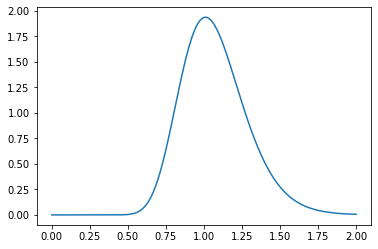

In [19]:
mu = 0.05
sigma = 0.2
S0 = 1
x = np.linspace(0,2,1000)
y = lognorm.pdf(x, sigma,0,math.exp(mu))
plt.plot(x,y)
plt.show()

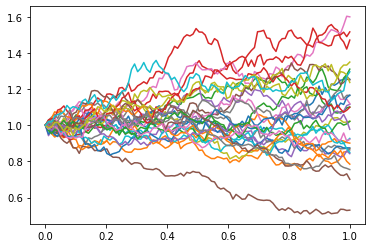

In [20]:
Nsim = 30
t0 = 0
t1 = 1
Nt = 100
mu=0.05
sigma=0.2
S0 = 1
t = np.linspace(t0,t1,Nt)
dt = (t1-t0)/Nt
S = np.zeros([Nsim,Nt])
S[:,0] = S0
for j in range(0, Nt-1):
    S[:,j+1] = S[:,j]*np.exp((mu-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0,1, Nsim))
for j in range(0,Nsim):
    plt.plot(t,S[j,:])
plt.show()

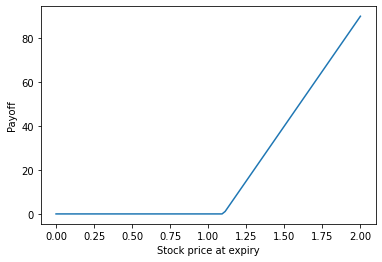

In [21]:
k = 1.1
def payoff(x):
    return 100*np.maximum(0,x-k)
x=np.linspace(0,2, 100)
y=payoff(x)
plt.plot(x,y)
plt.xlabel('Stock price at expiry')
plt.ylabel('Payoff')
plt.show()

In [22]:
import math

In [23]:
Nsim = 10000
amount_underlying = 100
strike = 1.1
sigma = 0.2
mu = 0.06
r = 0.015
def payoff(x):
    return amount_underlying * np.maximum(0, x-strike)
num0 = np.random.normal(0,1,Nsim)
S0 = 15
S1 = np.exp(r-sigma**2/2+sigma*num0)
C0 = math.exp(-r)*np.mean(payoff(S1))
print(C0)


4.938162256933248


In [24]:
import numpy as np
from scipy.stats import norm

In [25]:
amount_underlying = 100
strike = 1.1
sigma = 0.2
mu = 0.06
r = 0.015
S0 = 1
t = 1
def fun_d1(sigma,k,t,r,x):
    return (np.log(x/k) + (r+sigma**2/2)*t)/(sigma*np.sqrt(t))
def fun_d2(sigma,k,t,r,x):
    return fun_d1(sigma,k,t,r,x) - sigma*np.sqrt(t)
def call_value(amount_underlying, sigma,k,t,r,x):
    d1 = fun_d1(sigma,k,t,r,x)
    d2 = fun_d2(sigma,k,t,r,x)
    temp = norm.cdf(d1)*x-norm.cdf(d2)*k*np.exp(-r*t)
    return amount_underlying * temp
   
C0 = call_value(amount_underlying, sigma,strike,t,r,S0)
print(C0)

4.775025500484964
